# Universe Evolution from the Friedmann equations

## Friedmann Equations

The equations are
$$ \left( \frac{\dot a}{a} \right)^2 = \frac{8 \pi G}{3} \rho - \frac{kc^2}{a^2}$$  
$$ \dot\rho_i =  -3\frac{\dot a}{a}\left(\rho_i+\frac{P_i}{c^2}\right) $$ 
This can be rewritten as $ p(t) = p_0 \left( \frac{a}{a_0} \right) ^{-3(1+w)}$ or using the ratio $ \Omega=\frac{\rho}{\rho_c}= \rho \frac{8 \pi G}{3H^2} $ we got 
$$ \left( \frac{\dot a}{a} \right)^2 = H_0^2 (\Omega_ma^{-3} + \Omega_r a^{-4} + \Omega_\Lambda- \frac{kc^2}{a^2}) $$  


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

G = 6.6743e-11
c =  299792458 
H0 = 2.27e-18 #Hubble constant in Si units

### Properties of the universe at t0

In [7]:
critical_density = lambda H : 3*H**2/(8*np.pi*G)

print(critical_density(H0))

9.215679991814431e-27


In [8]:
Omega0 = {'m': 1.0, 'r':0.0, 'L': 0.0, 'k': 0.0}

In [ ]:
class Universe:
  __init__(self, )

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00 -1.001e+17 -2.002e+17]
        y: [[ 1.000e+00  7.574e-01  4.665e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 530
     njev: 0
      nlu: 0
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+17 ...  9.990e+19  1.000e+20]
        y: [[ 1.000e+00  1.216e+00 ...  4.882e+01  4.886e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 176
     njev: 0
      nlu: 0
[-2.00200200e+17 -1.00100100e+17  0.00000000e+00 ...  9.97997998e+19
  9.98998999e+19  1.00000000e+20]


/tmp/ipykernel_4145/2212026604.py:6: RuntimeWarning: invalid value encountered in sqrt
  return H0*(Omega_m*a**-1 + Omega_r*a**-2 + Omega_L*a**2 - Omega_k)**0.5


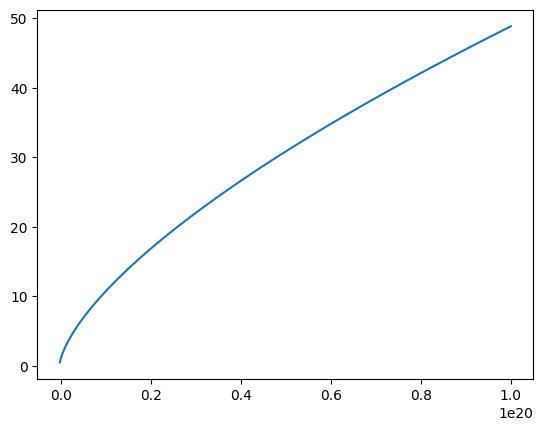

In [9]:
t_lims = [-1e20, 1e20]
Omega_m, Omega_r, Omega_L, Omega_k = Omega0['m'], Omega0['r'], Omega0['L'], Omega0['k']*c**2


def f(t, a):
  return H0*(Omega_m*a**-1 + Omega_r*a**-2 + Omega_L*a**2 - Omega_k)**0.5

Y_past = solve_ivp(f, (0, t_lims[0]), y0 = [1.0], method= 'RK45', t_eval= np.linspace(0, t_lims[0], 1000))
Y_future = solve_ivp(f, (0, t_lims[1]), y0 = [1.0], method= 'RK45', t_eval= np.linspace(0, t_lims[1], 1000))

print(Y_past)
print(Y_future)


T = np.append(np.flip(Y_past.t), Y_future.t)
a = np.append(np.flip(Y_past.y[0]), Y_future.y[0])
print(T)
plt.plot(T,a)